

# <center>LINEAR REGRESSION</center>

<a id=section1></a>

##  Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

__Importing Packages__

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

import warnings
warnings.filterwarnings("ignore")

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [171]:
data = pd.read_csv('Advertising.csv')
data.head()
data.columns=['TV','radio','newspaper','sales']

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

<a id=section3></a>

##  Exploratory Data Analysis

In [172]:
data.shape

(200, 4)

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [174]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

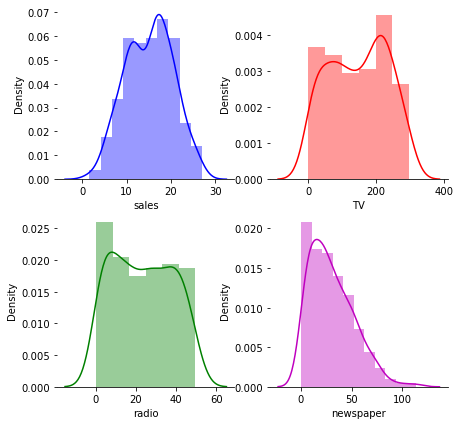

In [175]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])
sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.radio, color="g", ax=axes[1, 0])

sns.distplot(data.newspaper, color="m", ax=axes[1, 1])



__Observations__<br/>
_Sales_ seems to be __normal distribution__. Spending on _newspaper advertisement_ seems to be __right skewed__. Most of the spends on _newspaper_ is __fairly low__ where are spend on _radio and tv_ seems be __uniform distribution__. Spends on _tv_ are __comparatively higher__ then spend on _radio and newspaper_.

### Is there a relationship between sales and spend various advertising channels?

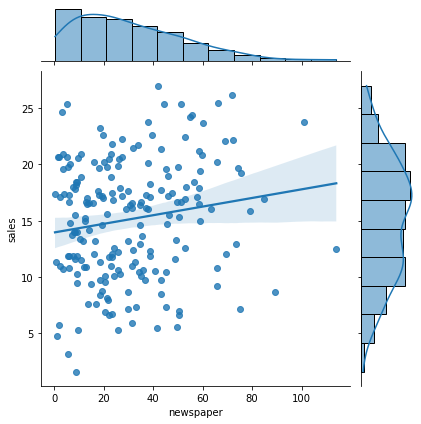

In [176]:
JG1 = sns.jointplot("newspaper", "sales", data=data, kind='reg')

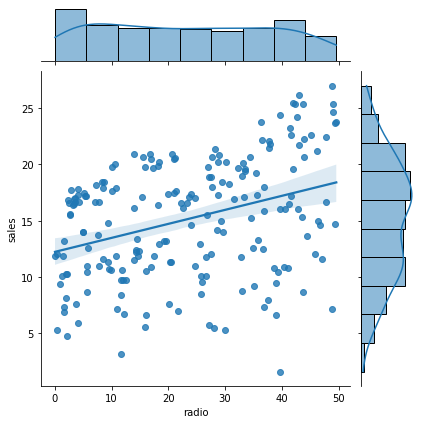

In [177]:
JG2 = sns.jointplot("radio", "sales", data=data, kind='reg')

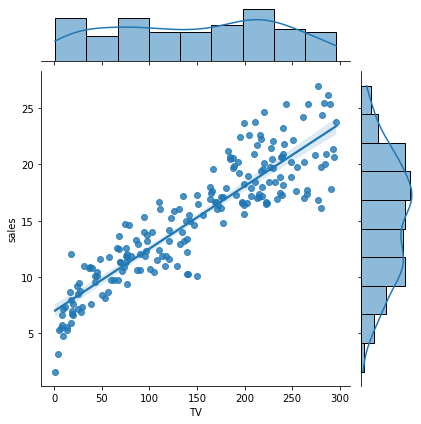

In [178]:
JG3 = sns.jointplot("TV", "sales", data=data, kind='reg')

__Observation__<br/>
_Sales and spend on newpaper_ is __not__ highly correlaed where are _sales and spend on tv_ is __highly correlated__.

### Visualising Pairwise correlation

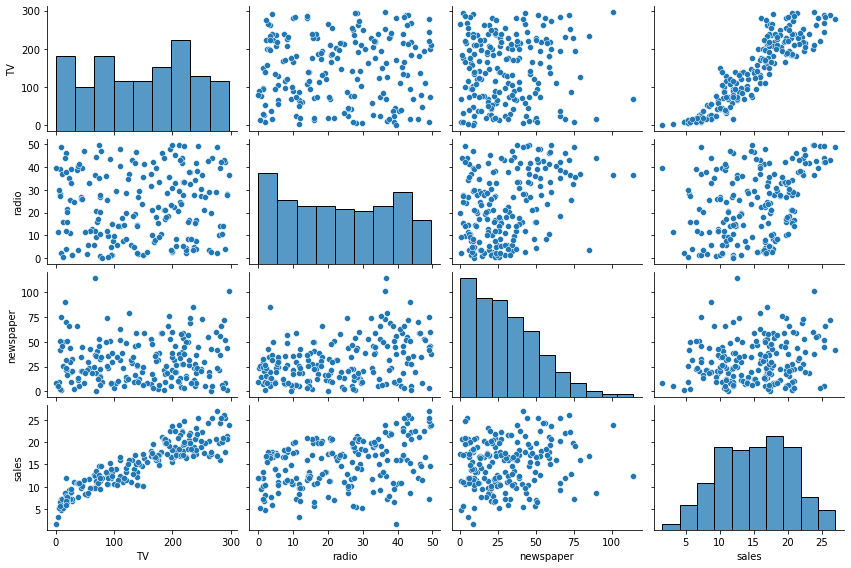

In [179]:
sns.pairplot(data, size = 2, aspect = 1.5)

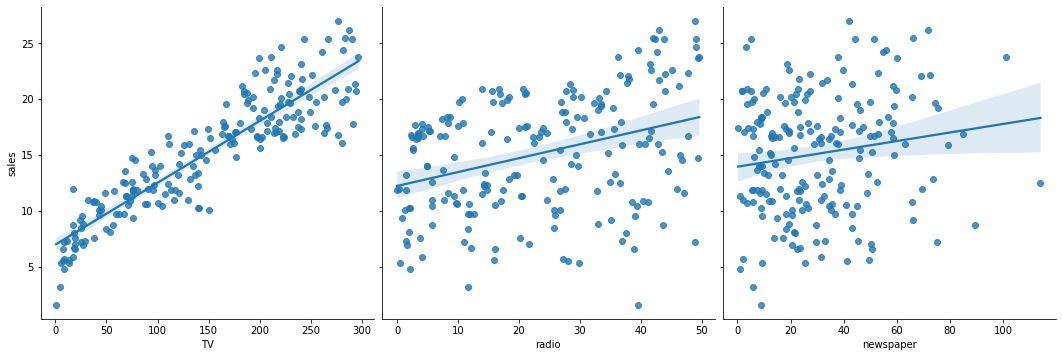

In [180]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales



### Calculating and plotting heatmap correlation

In [181]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.901208
radio,0.054809,1.000000,0.354104,0.349631
newspaper,0.056648,0.354104,1.000000,0.157960
sales,0.901208,0.349631,0.157960,1.000000


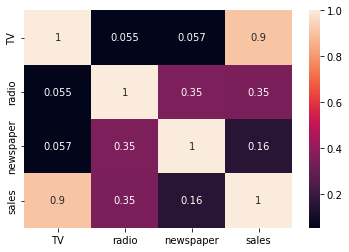

In [182]:
sns.heatmap( data.corr(), annot=True );

<a id=section4></a>

##  Introduction to Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

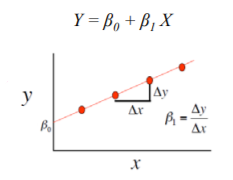

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?

<a id=section401></a>

###  Linear Regression Equation with Errors in consideration

While taking errors into consideration the equation of linear regression is: 
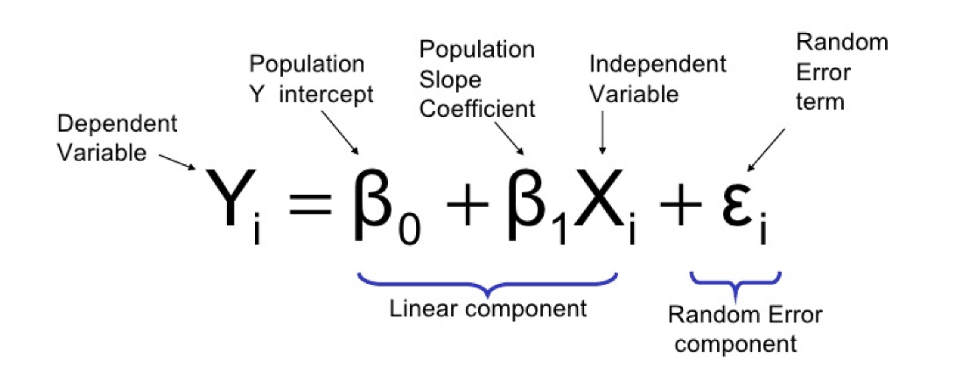
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):


What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.
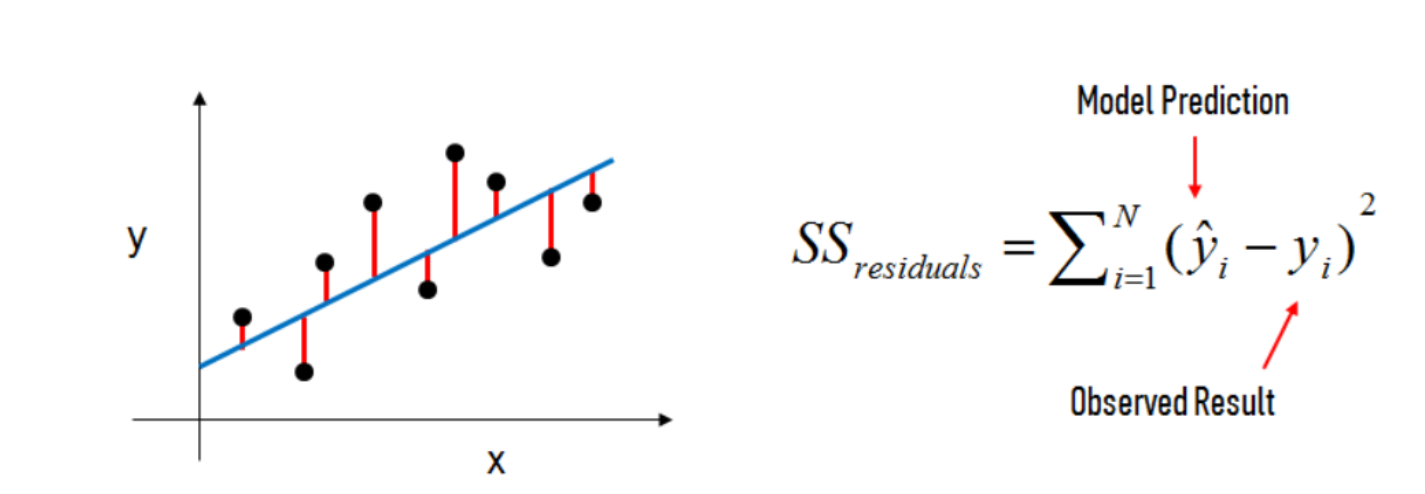


How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:
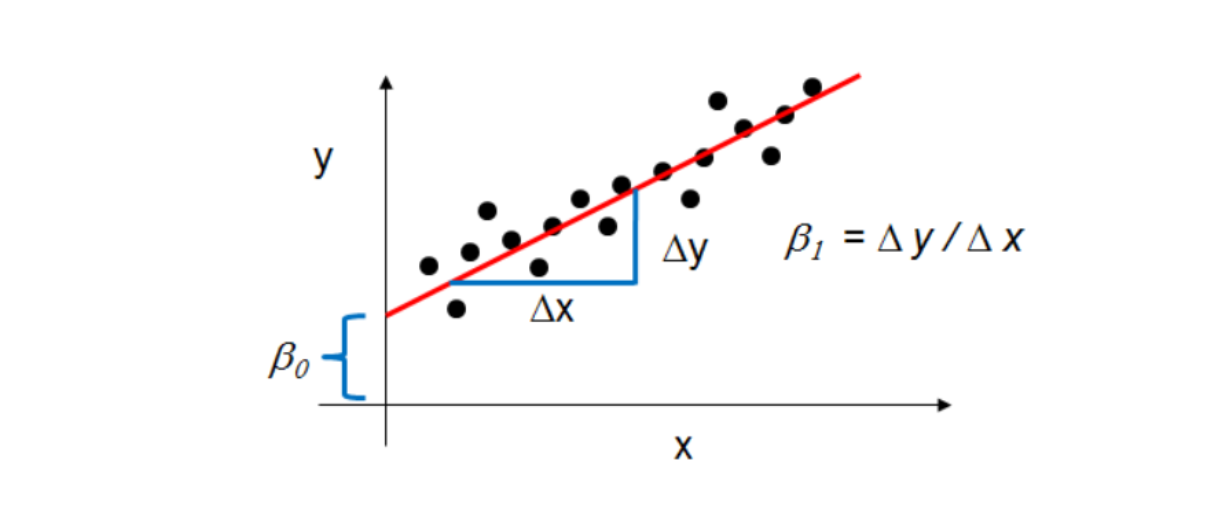

<a id = sectionassumptions></a>

####  Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

<a id=section402></a>

###  Preparing X and y using pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

In [184]:
data1 # Output of the transformation is an array. We need to convert the array to a Data Frame for further analysis.

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.32231867e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -8.97514665e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -5.93947713e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         2.59834337e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
         5.25455420e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.50464857e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -6.31893582e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -3.66272500e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.95999899e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
         8.90779273e-02],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -4.80110107e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [185]:
data = pd.DataFrame(data1)
data.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455


In [186]:
data.columns = ['TV','radio','newspaper','sales']
data.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455


In [187]:
data_v2 = data.copy()

In [188]:
feature_cols = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
X = data[feature_cols]                                     # use the list to select a subset of the original DataFrame-+

- Checking the type and shape of X.

In [189]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [190]:
y = data.sales
y.head()

0    1.322319
1   -0.897515
2   -0.593948
3    0.259834
4    0.525455
Name: sales, dtype: float64

- Check the type and shape of y

In [191]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


<a id=section403></a>

###  Splitting X and y into training and test datasets.

In [192]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1) ## 100  >> Splitting the Data in Test Data Set and Train Data Set in ratio 20:80

In [193]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40,)


<a id=section404></a>

###  Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

### Linear Regression Model 


In [194]:
from sklearn.linear_model import LinearRegression
X = data[feature_cols]  
y = data.sales
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
print("Train Score:",linreg.score(X_train,y_train))
print("Test Score:",linreg.score(X_test,y_test))


Train Score: 0.899374584012456
Test Score: 0.9071151423684273


<a id=section405></a>

### 4.5 Interpreting Model Coefficients

In [195]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -0.007486851416405302
Coefficients: [ 0.89404481  0.28803517 -0.00621184]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [196]:
feature_cols.insert(0,'Intercept')  

In [197]:
coef = linreg.coef_.tolist()
coef

[0.8940448073278737, 0.28803517111973315, -0.0062118364948499545]

In [198]:
coef.insert(0, linreg.intercept_)

In [199]:
coef

[-0.007486851416405302,
 0.8940448073278737,
 0.28803517111973315,
 -0.0062118364948499545]

In [200]:
eq1 = zip(feature_cols, coef)

eq1

In [201]:
for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.007486851416405302
TV 0.8940448073278737
radio 0.28803517111973315
newspaper -0.0062118364948499545


__y = -0.007 + 0.8940 `*` TV + 0.2880`*` radio -0.006 `*` newspaper__

How do we interpret the TV coefficient (_0.77081_)
- A "unit" increase in TV ad spending is **associated with** a _"0.7708_ unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 770.8 widgets.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__

<a id=section406></a>

###  Using the Model for Prediction

In [202]:
linreg.fit(X_train, y_train) 
y_pred_train = linreg.predict(X_train)  

In [203]:
y_pred_test = linreg.predict(X_test)                                                           # make predictions on the testing set

In [204]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train, y_pred_train)
r2_test=r2_score(y_test, y_pred_test)



n= len(X_train)
p=len(X.columns)
adjusted_r_squared_test=1- ((1-r2_test) * (n-1)/(n-p-1)) 
adjusted_r_squared_train=1- ((1-r2_train) * (n-1)/(n-p-1)) 

print('r2_test:',r2_test)
print("adjusted_r_squared_test:",adjusted_r_squared_test)
print("------------------------------------------------------")
print('r2_train:',r2_train)
print("adjusted_r_squared_train:",adjusted_r_squared_train)




r2_test: 0.9071151423684273
adjusted_r_squared_test: 0.9050662116853778
------------------------------------------------------
r2_train: 0.899374584012456
adjusted_r_squared_train: 0.8971549057186131


- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section5></a>

##  Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section501></a>

###  Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [205]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [206]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.2413260780729392
MAE for test set is 0.22667756230016473


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [207]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [208]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.10316513596895739
MSE for test set is 0.0853371785289501


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [209]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [210]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.3211933000063317
RMSE for test set is 0.2921252788256266


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

<a id=section502></a>

### Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [211]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)



0.899374584012456 0.8971549057186131


In [212]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9071151423684273 0.9021391678524502


__conclusion__:</br>
The model efficiency is 90